## Process raw .txt data
### - IMDB Dataset
The raw (.txt) IMDB review data can be downloaded [here](http://mng.bz/0tIo). It consists of two folders **train** and **test**. <br>
Each folder has two folders **neg** and **pos** contains negative reviews and positive reviews respectively.<br>
In this note I will do some data processing to turn these raw data into a tractable format for model building with the following procedure:

1. Read in all .txt data (2,5000 files for both training and testing set)
2. Create lables for these text data
3. Vecotorize text data 
4. Padding the data to make them the same length 
5. Prepare training and validation set
6. Build naive model as baseline

In [35]:
import os 
import numpy as np
import pandas as pd

In [36]:
base_dir = os.getcwd()
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_pos_dir = os.path.join(train_dir, 'pos')
train_neg_dir = os.path.join(train_dir, 'neg')
test_pos_dir = os.path.join(test_dir, 'pos')
test_neg_dir = os.path.join(test_dir, 'neg')

In [73]:
def get_files_dir(folder_dir):
    
    '''Get the directory of all files in the folder
    '''
    return [os.path.join(folder_dir, f) 
            for f in os.listdir(folder_dir) 
            if f.endswith('.txt')]

train_pos_lst = get_files_dir(train_pos_dir)
train_neg_lst = get_files_dir(train_neg_dir)
test_pos_lst = get_files_dir(test_pos_dir)
test_neg_lst = get_files_dir(test_neg_dir)

### Let's take a look at the raw data:

In [38]:
open(train_pos_lst[122], 'r').read()

"I love this show!<br /><br />Every time i watch an episode i repeat that line and remind myself how good of a show this is. I am a huge sci-fi fan and this show has grounds to be the most important science (fiction?) show in the history of film/TV. There are so many theories in this show about the universe i could start a religion. Its amazing, season after season the show gets better and better.<br /><br />I've been a fan of MacGyver since i was 5 (19 now) and i find it so ironic that my 2 favorite TV shows of all time star Richard Dean Anderson. Its also interesting how each character is practically the opposite of the other.<br /><br />Back when i first saw Stargate the movie, i instantly liked it and considered it one of my favorite sci-fi flicks, then hearing a TV show would spin from it i got really excited, but didn't get showtime till the fifth season was almost over.<br /><br />Though, I'm disappointed to hear that Roland Emmerich and Dean Devlin wanted to do a trilogy of mov

In [39]:
print(len(train_pos_lst))
print(len(train_neg_lst))

12500
12500


### Read in all the data and store in DataFrame

In [17]:
def read_pos_data(txt_dir): 
    txt = open(txt_dir, 'r', encoding='utf8').read()
    return {'review':txt, 'label':1}

def read_neg_data(txt_dir): 
    txt = open(txt_dir, 'r', encoding='utf8').read()
    return {'review':txt, 'label':0}

In [19]:
train_data = (list(map(read_pos_data, train_pos_lst)) 
             + list(map(read_neg_data, train_neg_lst)))
test_data = (list(map(read_pos_data, test_pos_lst)) 
             + list(map(read_neg_data, test_neg_lst)))
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

In [40]:
print('Train data shape: ', train_df.shape)
display(train_df.head())
print('Test data shape: ', test_df.shape)
display(test_df.head())

Train data shape:  (25000, 2)


,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


Test data shape:  (25000, 2)


,review,label
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


### Shuffle the rows before further procession:

In [49]:
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [51]:
display(train_df.head())
display(test_df.head())

,review,label
18198,One has to wonder if at any point in the produ...,0
10270,"Here's a gritty, get-the-bad guys revenge stor...",1
7846,Moonwalker is probably not the film to watch i...,1
5074,Bette Midler is again Divine! Raunchily humoro...,1
20092,Do we really need any more narcissistic garbag...,0


,review,label
24015,I had a bad feeling ten seconds into the film ...,0
5796,When I saw this movie i expected it to be a ch...,1
17317,"One of the worst movies I've ever seen. Yes, I...",0
936,The BBC surpassed themselves with the boundari...,1
1495,Beautiful film set in 1962 Hong Kong about a m...,1


### Tokenize the data

In [52]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [53]:
maxlen = 100
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(list(train_df.review))

In [65]:
# Fit the tokenizer on training data 
# Apply on both training and testing data
train_seq = tokenizer.texts_to_sequences(list(train_df.review))
test_seq = tokenizer.texts_to_sequences(list(test_df.review))

x_train, x_test = train_seq.copy(), test_seq.copy()
y_train, y_test = np.array(train_df.label), np.array(test_df.label)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

display(x_train.shape)
display(x_test.shape)

(25000, 100)

(25000, 100)

In [66]:
x_train[0]

array([   1, 3309,  944,   12, 6041,    7,    7,  135,   59,  256,   11,
        944,   10,   77,  132,   12,  824,    7,    7,    6,    3,   49,
        264,  182,  129,    2,   26,  124,   48,   26,   67,    7,    7,
         16,    1,  411,    2,  901, 1180,   26,    6,  345,   18,    7,
          7,  102,  213,    2,  137,   15,   54, 1730,  279, 2383,    6,
          7,    7,  695, 2962,    2,    1,  113,  624,    2,  455,   23,
          5,    7,    7,  273,    9, 2338,   21,   28, 5975,    6,   32,
       2401,    7,    7, 1095,    4,  422,   14,    9,   77,  239, 1965,
       9457,  141,  256,    7,    7,  162,  586,    5,  162,  103,   11,
         19])

### Prepare training and validation set

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.2, 
                                                  random_state = 0)

In [75]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(20000, 100)
(20000,)
(5000, 100)
(5000,)


Now the data is ready for use. 

### A Baseline model 

In [85]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Embedding(max_words, 5, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [86]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

C:\Users\wenxu\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 119us/step - loss: 0.7098 - acc: 0.5767 - val_loss: 0.5115 - val_acc: 0.7744
Epoch 2/10
20000/20000 [==============================] - 2s 95us/step - loss: 0.4217 - acc: 0.8036 - val_loss: 0.3639 - val_acc: 0.8376
Epoch 3/10
20000/20000 [==============================] - 2s 103us/step - loss: 0.3556 - acc: 0.8437 - val_loss: 0.3494 - val_acc: 0.8428
Epoch 4/10
20000/20000 [==============================] - 2s 97us/step - loss: 0.3227 - acc: 0.8626 - val_loss: 0.3480 - val_acc: 0.8446
Epoch 5/10
20000/20000 [==============================] - 2s 95us/step - loss: 0.3115 - acc: 0.8694 - val_loss: 0.3491 - val_acc: 0.8478
Epoch 6/10
20000/20000 [==============================] - 2s 104us/step - loss: 0.2894 - acc: 0.8794 - val_loss: 0.3541 - val_acc: 0.8488
Epoch 7/10
20000/20000 [==============================] - 2s 95us/step - loss: 0.2851 - acc: 0.8802 - val_loss: 0.3557 - val_a

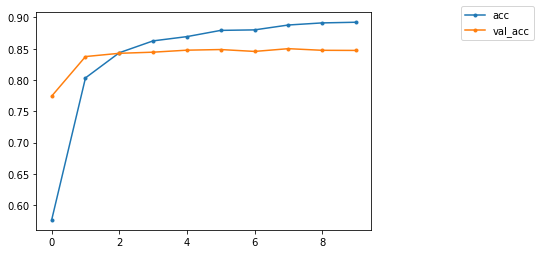

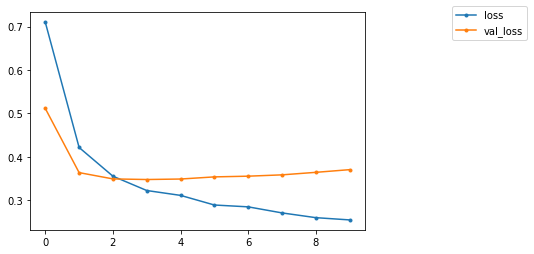

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
ax1 = pd.DataFrame(history.history)[['acc', 'val_acc']].plot(marker='.')
ax1.legend(bbox_to_anchor=(1.5, 1.05))
ax2 = pd.DataFrame(history.history)[['loss', 'val_loss']].plot(marker='.')
ax2.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()

**The validation accuracy is 0.8474 at the end of 10th epoch for this baseline model. Not bad!**